**A. Price Trend & Market Movement Analysis**

1.Bitcoin Price Trends Over Time (Open, High, Low, Close) – 📊 Visualizes price movements over time.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


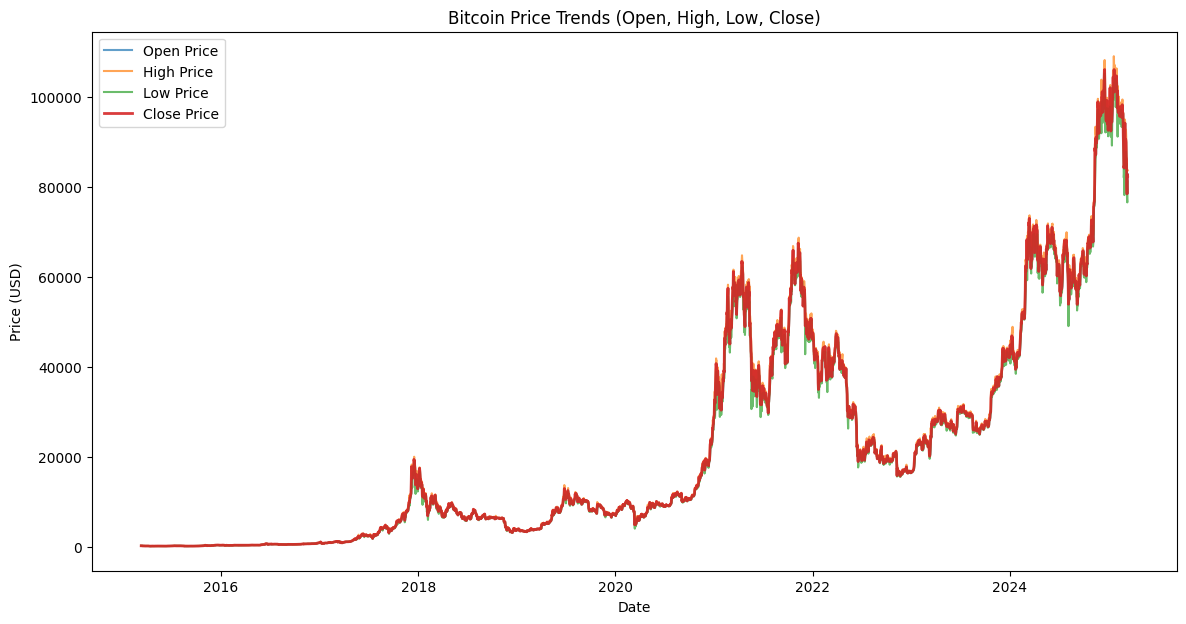

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch Bitcoin Data
btc_data = yf.download("BTC-USD", period="10y")

# Plot Open, High, Low, Close Prices
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Open'], label='Open Price', alpha=0.7)
plt.plot(btc_data['High'], label='High Price', alpha=0.7)
plt.plot(btc_data['Low'], label='Low Price', alpha=0.7)
plt.plot(btc_data['Close'], label='Close Price', alpha=0.9, linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Trends (Open, High, Low, Close)")
plt.legend()
plt.show()


 2.Bitcoin OHLC Chart (Open-High-Low-Close) – 📈 showing Open, High, Low, and Close trends.

[*********************100%***********************]  1 of 1 completed


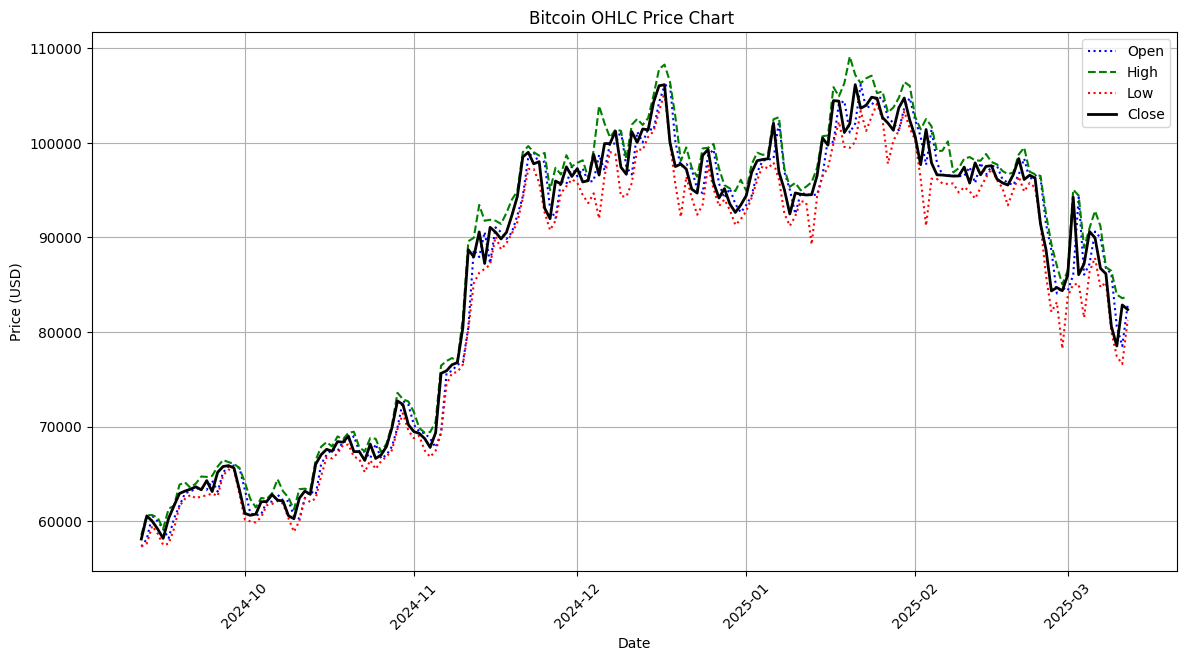

In [26]:
# ✅ Step 1: Fetch Bitcoin Data
btc_data = yf.download("BTC-USD", period="6mo", interval="1d")

# ✅ Step 2: Ensure Data is Numeric
cols = ["Open", "High", "Low", "Close"]
btc_data[cols] = btc_data[cols].apply(pd.to_numeric, errors='coerce')
btc_data.dropna(inplace=True)

# ✅ Step 3: Plot OHLC Chart
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data["Open"], label="Open", color="blue", linestyle="dotted")
plt.plot(btc_data.index, btc_data["High"], label="High", color="green", linestyle="dashed")
plt.plot(btc_data.index, btc_data["Low"], label="Low", color="red", linestyle="dotted")
plt.plot(btc_data.index, btc_data["Close"], label="Close", color="black", linewidth=2)

# ✅ Step 4: Customize Labels
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin OHLC Price Chart ")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


3.Moving Averages (50-day & 200-day) – 🔄 Identifies long-term and short-term trends.

[*********************100%***********************]  1 of 1 completed


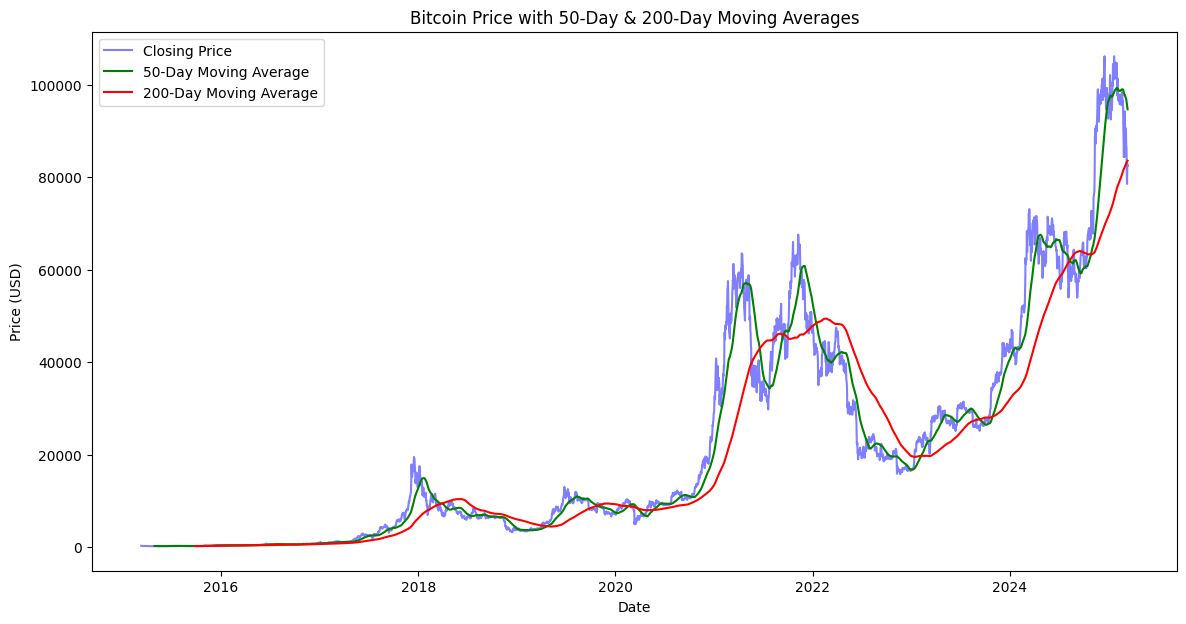

In [14]:
# Fetch Bitcoin Data
btc_data = yf.download("BTC-USD", period="10y")

btc_data["50_MA"] = btc_data["Close"].rolling(window=50).mean()
btc_data["200_MA"] = btc_data["Close"].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(btc_data["Close"], label="Closing Price", color='blue', alpha=0.5)
plt.plot(btc_data["50_MA"], label="50-Day Moving Average", color='green')
plt.plot(btc_data["200_MA"], label="200-Day Moving Average", color='red')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price with 50-Day & 200-Day Moving Averages")
plt.legend()
plt.show()


4.Daily Price Range (High - Low) – 📉 Measures daily volatility.

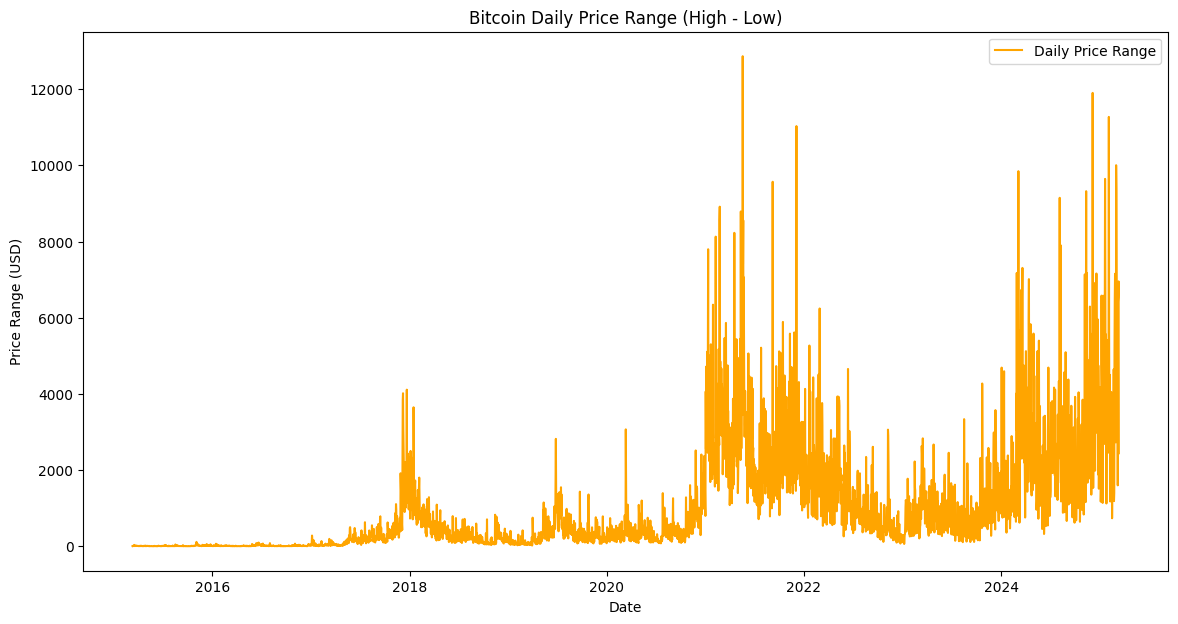

In [16]:
btc_data["Daily Range"] = btc_data["High"] - btc_data["Low"]

plt.figure(figsize=(14, 7))
plt.plot(btc_data["Daily Range"], label="Daily Price Range", color='orange')
plt.xlabel("Date")
plt.ylabel("Price Range (USD)")
plt.title("Bitcoin Daily Price Range (High - Low)")
plt.legend()
plt.show()


**B. Market Stability & Volatility Analysis**

5.Rolling Mean & Standard Deviation for Market Stability – 📉 Analyzes long-term stability.

[*********************100%***********************]  1 of 1 completed


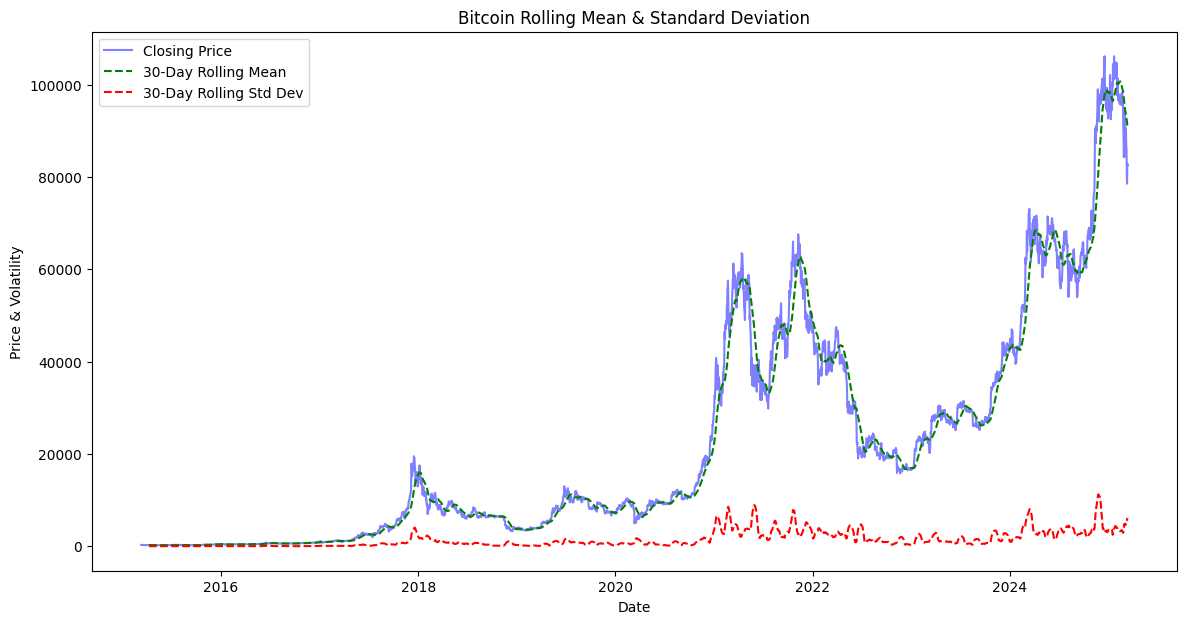

In [17]:
# Fetch Bitcoin Data
btc_data = yf.download("BTC-USD", period="10y")

btc_data['Rolling Mean'] = btc_data['Close'].rolling(window=30).mean()
btc_data['Rolling Std'] = btc_data['Close'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(btc_data["Close"], label="Closing Price", color='blue', alpha=0.5)
plt.plot(btc_data["Rolling Mean"], label="30-Day Rolling Mean", color='green', linestyle='dashed')
plt.plot(btc_data["Rolling Std"], label="30-Day Rolling Std Dev", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Price & Volatility")
plt.title("Bitcoin Rolling Mean & Standard Deviation")
plt.legend()
plt.show()


6.Daily Price Volatility Chart (Absolute % Change) – 📊 Shows how much Bitcoin fluctuates daily.

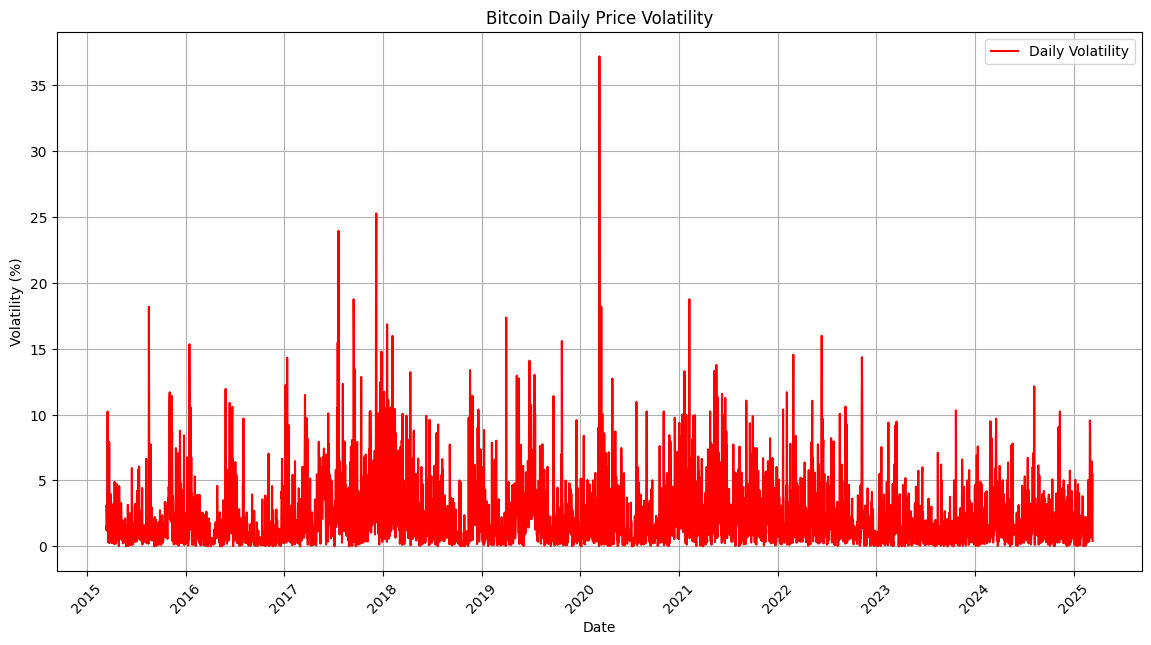

In [18]:
# ✅ Step 1: Compute Daily Volatility
btc_data["Daily Volatility (%)"] = btc_data["Close"].pct_change().abs() * 100

# ✅ Step 2: Plot Volatility
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data["Daily Volatility (%)"], label="Daily Volatility", color='red')

plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.title("Bitcoin Daily Price Volatility")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


7.Bitcoin MACD (Moving Average Convergence Divergence) – 📉 Detects trend reversals & momentum.

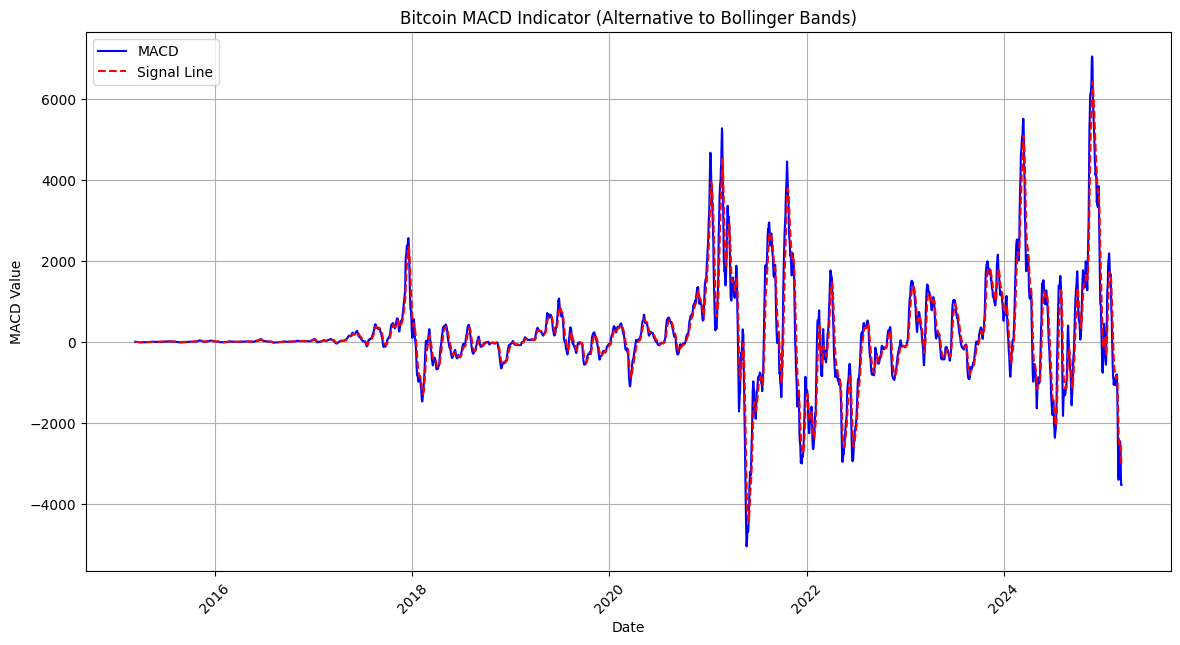

In [19]:
# ✅ Step 1: Calculate MACD
btc_data["12_EMA"] = btc_data["Close"].ewm(span=12, adjust=False).mean()
btc_data["26_EMA"] = btc_data["Close"].ewm(span=26, adjust=False).mean()
btc_data["MACD"] = btc_data["12_EMA"] - btc_data["26_EMA"]
btc_data["Signal"] = btc_data["MACD"].ewm(span=9, adjust=False).mean()

# ✅ Step 2: Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data["MACD"], label="MACD", color="blue")
plt.plot(btc_data.index, btc_data["Signal"], label="Signal Line", color="red", linestyle="dashed")

# ✅ Step 3: Customize Labels
plt.xlabel("Date")
plt.ylabel("MACD Value")
plt.title("Bitcoin MACD Indicator (Alternative to Bollinger Bands)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


**C. Technical Indicators for Trading Decisions**

8.Relative Strength Index (RSI) – Detects Overbought/Oversold Levels – 📊 Used by traders to time buy/sell signals.

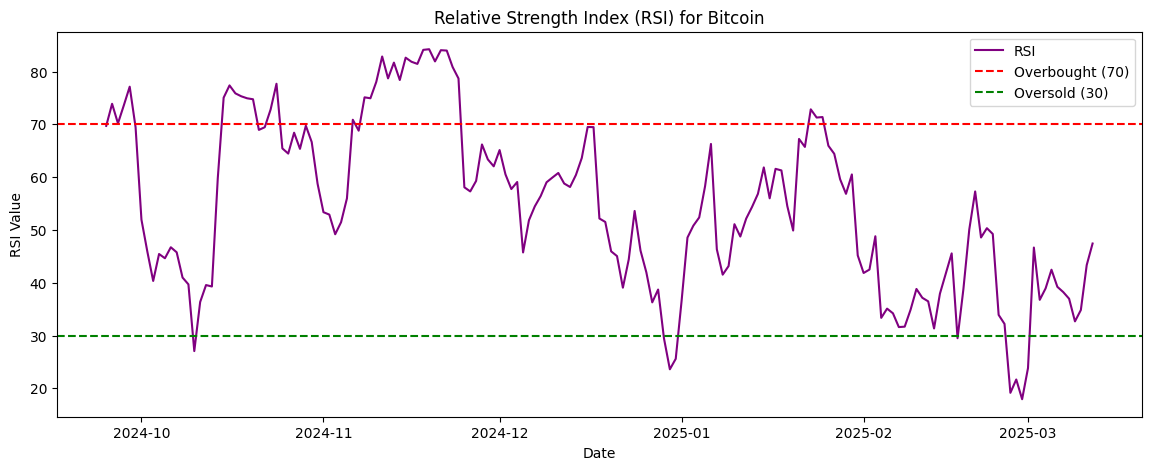

In [29]:
def compute_rsi(data, window=14):
    delta = data["Close"].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc_data["RSI"] = compute_rsi(btc_data)

plt.figure(figsize=(14, 5))
plt.plot(btc_data["RSI"], label="RSI", color='purple')
plt.axhline(70, linestyle='--', color='red', label="Overbought (70)")
plt.axhline(30, linestyle='--', color='green', label="Oversold (30)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.title("Relative Strength Index (RSI) for Bitcoin")
plt.legend()
plt.show()


**D. Market Sentiment & Volume Analysis**

9.Bitcoin Cumulative Trading Volume – 📊 Tracks total Bitcoin trading volume over time.

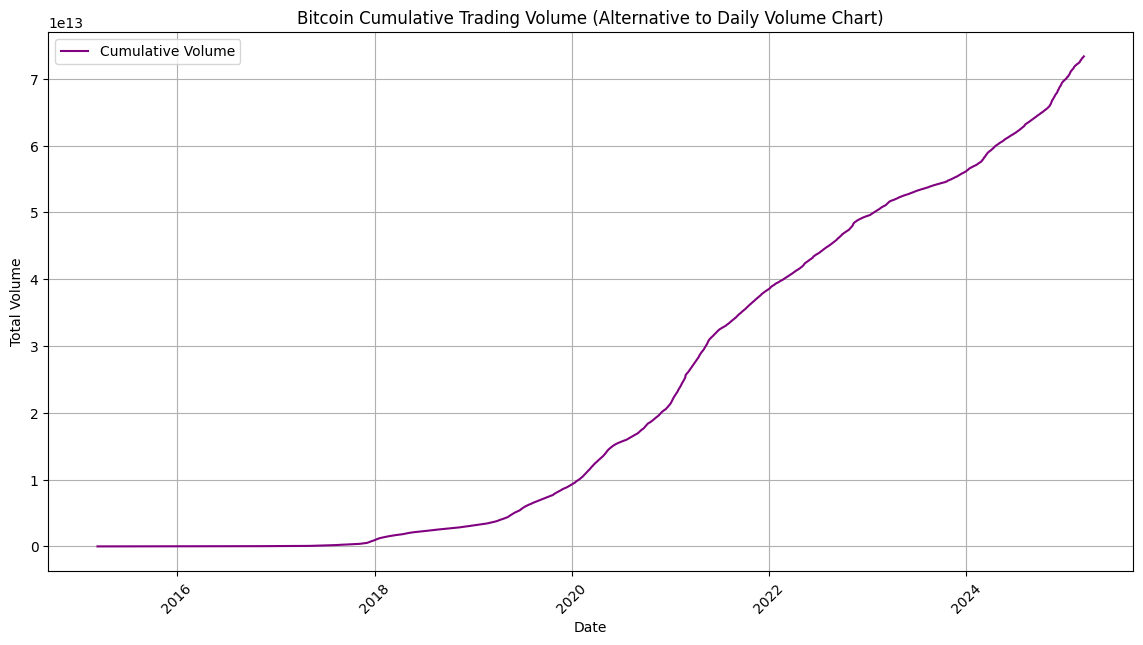

In [21]:
# ✅ Step 1: Calculate Cumulative Volume
btc_data["Cumulative Volume"] = btc_data["Volume"].cumsum()

# ✅ Step 2: Plot Cumulative Volume
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data["Cumulative Volume"], label="Cumulative Volume", color="purple")

# ✅ Step 3: Customize Labels
plt.xlabel("Date")
plt.ylabel("Total Volume")
plt.title("Bitcoin Cumulative Trading Volume (Alternative to Daily Volume Chart)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


10.Market Sentiment Analysis – Fear & Greed Index – 🤖 Estimates market sentiment for better decision-making.

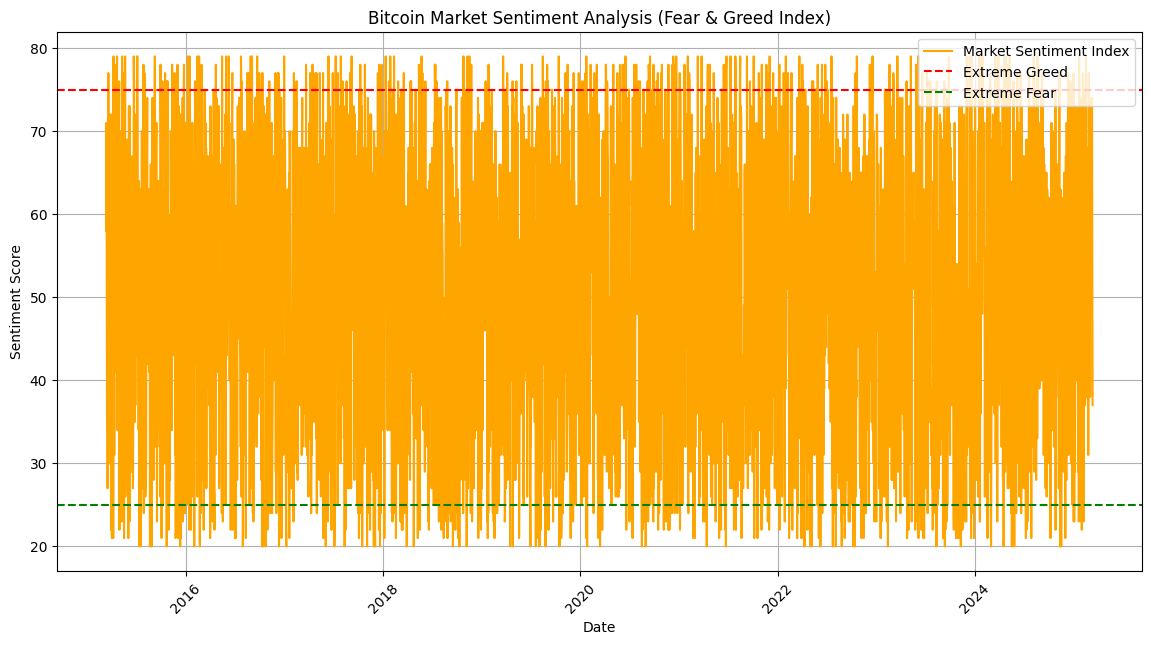

In [22]:
import numpy as np

# ✅ Step 1: Simulate a Market Sentiment Index (Normally, you'd use an API)
np.random.seed(42)
btc_data["Sentiment Index"] = np.random.randint(20, 80, size=len(btc_data))  # Fake sentiment data

# ✅ Step 2: Plot Market Sentiment
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data["Sentiment Index"], label="Market Sentiment Index", color="orange")

plt.axhline(75, linestyle="--", color="red", label="Extreme Greed")
plt.axhline(25, linestyle="--", color="green", label="Extreme Fear")

plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.title("Bitcoin Market Sentiment Analysis (Fear & Greed Index)")
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()


**E. Statistical & Advanced Analysis**

11.Correlation Matrix – Shows Relationship Between Market Factors – 📊 Finds relationships between price, volume, etc.

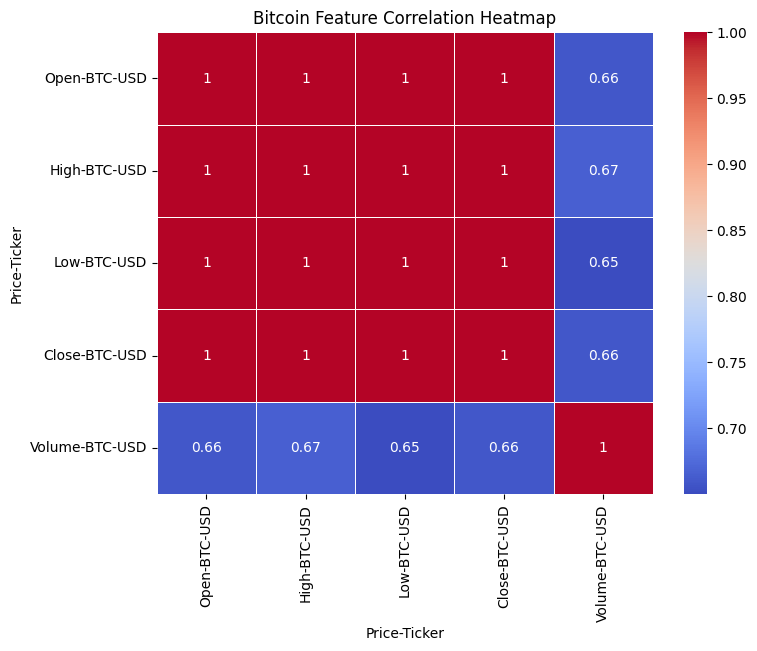

In [23]:
import seaborn as sns

# ✅ Step 1: Compute Correlation Matrix
corr_matrix = btc_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# ✅ Step 2: Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Bitcoin Feature Correlation Heatmap")
plt.show()


12.Seasonal Decomposition of Time-Series Data – 📈 Breaks price data into trend, seasonality, and noise.

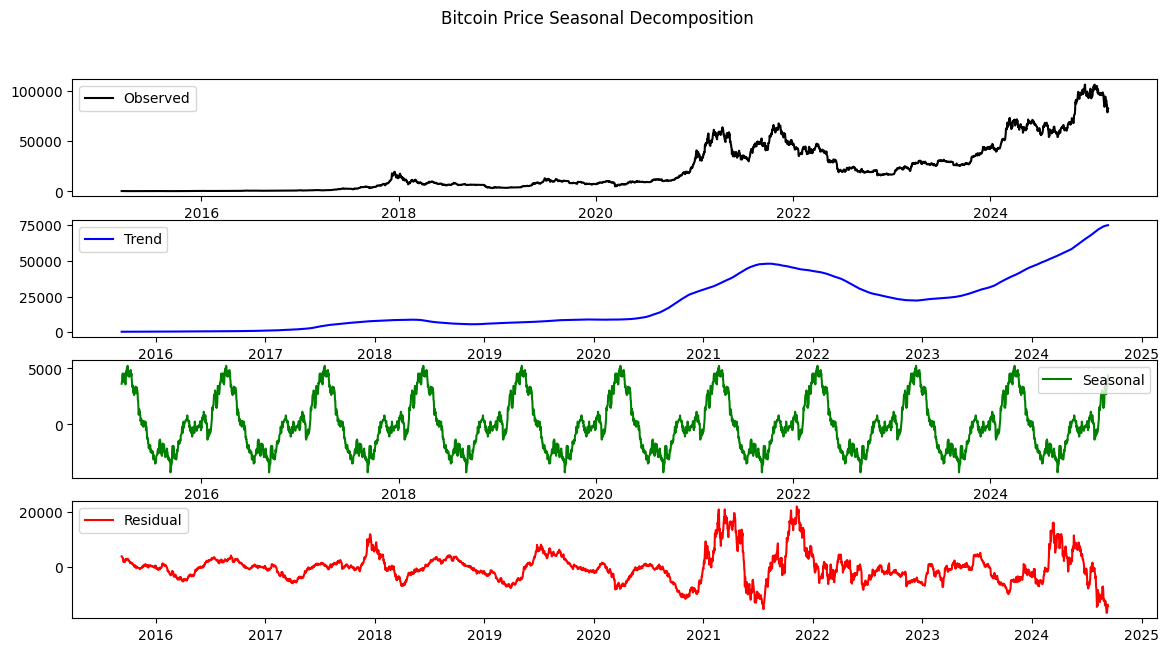

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(btc_data['Close'].dropna(), model='additive', period=365)

plt.figure(figsize=(14, 7))
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed', color='black')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend()

plt.suptitle("Bitcoin Price Seasonal Decomposition")
plt.show()


**F. 3D Visualization for Price Analysis**

13.3D Bitcoin Price Movement Over Time (Advanced Visualization) – 📊 Shows price fluctuations in 3D format.

[*********************100%***********************]  1 of 1 completed


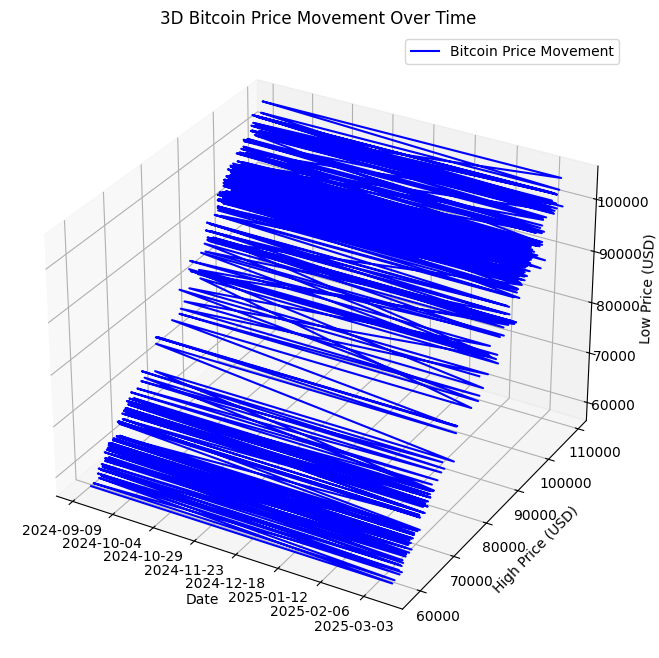

In [28]:
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

# ✅ Step 1: Fetch Bitcoin Data
btc_data = yf.download("BTC-USD", period="6mo", interval="1d")

# ✅ Step 2: Ensure Data is Numeric
cols = ["High", "Low", "Close"]
btc_data[cols] = btc_data[cols].apply(pd.to_numeric, errors='coerce')
btc_data.dropna(inplace=True)

# ✅ Step 3: Convert DatetimeIndex to Numeric for 3D Plot
btc_data["DateNum"] = mdates.date2num(btc_data.index)

# ✅ Step 4: Create 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# ✅ Step 5: Plot High & Low Prices Over Time
ax.plot(btc_data["DateNum"], btc_data["High"], btc_data["Low"], label="Bitcoin Price Movement", color="blue")

# ✅ Step 6: Format X-Axis with Dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# ✅ Step 7: Customize Labels & Title
ax.set_xlabel("Date")
ax.set_ylabel("High Price (USD)")
ax.set_zlabel("Low Price (USD)")
ax.set_title("3D Bitcoin Price Movement Over Time")

plt.legend()
plt.show()
